In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from random import randint
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression

### Read the data
Read the data as a panda data frame and convert it to numpy array.

In [2]:
Test = pd.read_csv("new_test4.txt", header=None, skip_blank_lines=False, delim_whitespace=True)
Test = Test.to_numpy()
Test_lines = np.asarray([Test[i][0].split(",") for i in range(Test.shape[0])])

In [3]:
print(Test_lines.shape)

(10740, 784)


### Visualising the data
The images are grayscale 28*28 pixel.

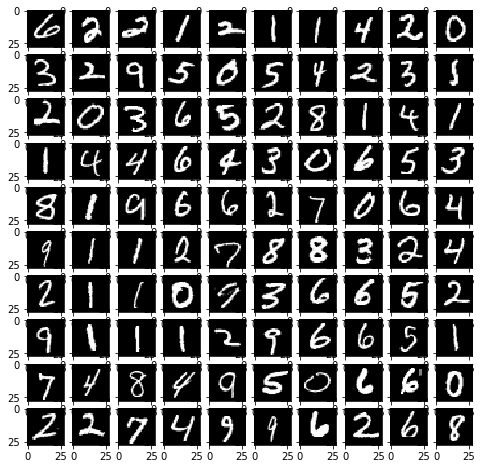

In [4]:
digits = Test_lines.reshape(Test_lines.shape[0],28,28)
fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(np.uint8(digits[i]), cmap='gray', vmin=0, vmax=255)
    

### Preprocessing

First, I normalized the data. Then I used 2 PCA and T-SNE for preprocessing with the use of sklearn libarary.

    1)PCA: k=50.
    2)T-SNE : after PCA, I normalized the data agin. it converts the data into (10740, 2).


In [5]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(200)
reduced_train = pca.fit_transform(Test_lines.astype(float)/255)
print(reduced_train[0][0:5])

[ 1.24366268 -0.24106393  1.92160333  2.58384179 -1.82515411]


In [6]:
# Normalization
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(reduced_train)  
reduced_train = transformer.transform(reduced_train)
print(reduced_train[0][0:5])

[ 0.16714072 -0.03239753  0.25825184  0.34725267 -0.24528965]


In [7]:
#T-SNE
from sklearn import manifold
                     
tsne = manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(reduced_train)
Test_lines = X_tsne
print(X_tsne[0:3])

[[ 48.037743  19.82183 ]
 [-22.314648  54.257095]
 [-34.23482   67.92678 ]]


### Visualizing the T-SNE result
The result of visualization shows that the data is separateble.

In [8]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

<Figure size 432x288 with 0 Axes>

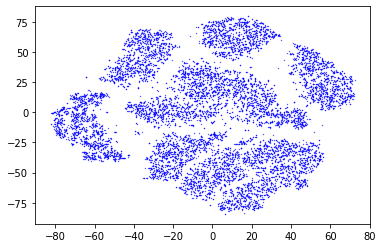

In [9]:
fig = plt.figure()

cmap = get_cmap(10)
fig, ax = plt.subplots()
for i in range(1):
        ax.scatter(X_tsne[:, 0], X_tsne[:, 1], s=0.09, c='b')

# K-Mean

In this section I used my own K-Mean Impelimentation. 
Some Imporatant note about it :

    1)I impelimented Kmean++.
    2)To get the best KMean. I run the algorithem 100 times and get the one with the least error.
    3)I used euclidean distance.
    4)The K-Mean class is in the KMean file.

In [10]:
from KMean import *


import time
start_time = time.time()


Error = np.zeros((100,))
label = np.zeros((100,10740))
centroid = np.zeros((100,10,2))
for i in range (100):
    Kmean_Irish = KMeans(Test_lines, 10, 2)
    Kmean_Irish.Random_centroid()
    Error[i], label[i], centroid[i]= Kmean_Irish.Main(100)
print("--- %s seconds ---" % (time.time() - start_time))



100%|██████████| 100/100 [00:00<00:00, 320.88it/s]

--- 34.07045102119446 seconds ---


In [11]:
Best_KMean = np.argmin(Error)
print(Error[Best_KMean])

150733.53184804987


In [12]:
label_Final = label[Best_KMean].astype(int)

### Visualizing the classification result

Each class is collerd with one color and the centroids are shown as a black dots.

<Figure size 432x288 with 0 Axes>

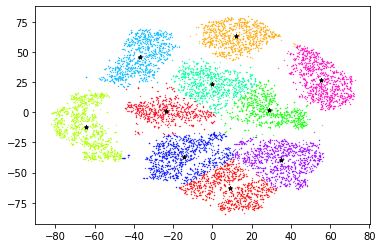

In [13]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt

matplotlib_axes_logger.setLevel('ERROR')
Test_lines = X_tsne
fig = plt.figure()

cmap = get_cmap(10)
fig, ax = plt.subplots()
for i in range(10):
        ax.scatter(Test_lines[label[Best_KMean]==i][:, 0], Test_lines[label[Best_KMean]==i][:, 1], s=0.09, c=cmap(i))
        ax.scatter(centroid[Best_KMean][i, 0], centroid[Best_KMean][i, 1], marker='*', s=15, c='#050505')


### Save the labels to the file

In [14]:
np.savetxt("KMean_P2" + ".txt", label_Final, fmt='%s')
